In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train_data/train/22325299158_6e32e599f8_m.jpg
/kaggle/input/train_data/train/11768468623_9399b5111b_n.jpg
/kaggle/input/train_data/train/5674707464_dc18de05b1.jpg
/kaggle/input/train_data/train/14244273988_a7484f18b7_m.jpg
/kaggle/input/train_data/train/10995953955_089572caf0.jpg
/kaggle/input/train_data/train/14925398301_55a180f919_n.jpg
/kaggle/input/train_data/train/5110110938_9da91455c4_m.jpg
/kaggle/input/train_data/train/4574102507_70039c8b28.jpg
/kaggle/input/train_data/train/15458787091_3edc6cd1eb.jpg
/kaggle/input/train_data/train/13509967925_eaaeefa396_m.jpg
/kaggle/input/train_data/train/9094631844_1a6abca29e.jpg
/kaggle/input/train_data/train/18876985840_7531dc8e6a.jpg
/kaggle/input/train_data/train/14097111174_87a2e7e0c7_n.jpg
/kaggle/input/train_data/train/14176042519_5792b37555.jpg
/kaggle/input/train_data/train/15973657966_d6f6005539_n.jpg
/kaggle/input/train_data/train/9111896677_ff0b6fa6f6_n.jpg
/kaggle/input/train_data/train/14145188939_b4de638bd3_n.jpg

/kaggle/input/train_data/train/6198569587_23c3693328_m.jpg
/kaggle/input/train_data/train/16525204061_9b47be3726_m.jpg
/kaggle/input/train_data/train/22274701614_901606ee34_n.jpg
/kaggle/input/train_data/train/14211880544_5d1f9d5aa8_n.jpg
/kaggle/input/train_data/train/5061135742_2870a7b691_n.jpg
/kaggle/input/train_data/train/8838983024_5c1a767878_n.jpg
/kaggle/input/train_data/train/5435521200_92029bbe2b_n.jpg
/kaggle/input/train_data/train/4571923094_b9cefa9438_n.jpg
/kaggle/input/train_data/train/8712267391_c756f18ee7_n.jpg
/kaggle/input/train_data/train/17080000869_a80e767f4a_m.jpg
/kaggle/input/train_data/train/14646283472_50a3ae1395.jpg
/kaggle/input/train_data/train/9939430464_5f5861ebab.jpg
/kaggle/input/train_data/train/8234846550_fdaf326dbe.jpg
/kaggle/input/train_data/train/4933229889_c5d9e36392.jpg
/kaggle/input/train_data/train/4933824012_8cbfe606f6.jpg
/kaggle/input/train_data/train/13923036338_1ce32c6d4f.jpg
/kaggle/input/train_data/train/16970837587_4a9d8500d7.jpg
/kag

In [2]:
from skimage.color import rgb2lab, lab2rgb, gray2rgb
from skimage.io import imsave
from skimage.transform import resize
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [3]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose, Conv2D, Flatten, Reshape, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#Create a data generator with some image augmentation.
input_path = '../input/train_data'
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    input_path,
    batch_size=64,
    target_size=(224,224),
    color_mode="rgb",
    class_mode=None)

Found 2429 images belonging to 1 classes.


In [5]:
valid_path = '../input/valid_data'
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    color_mode="rgb",
    class_mode=None)

Found 700 images belonging to 1 classes.


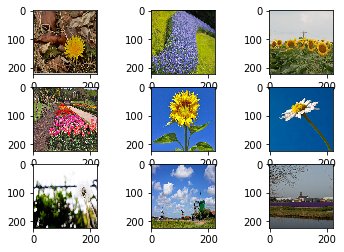

In [6]:
train = []
files = glob.glob("../input/train_data/train/*.jpg") # your image path

for myFile in files:
    train_img = load_img(myFile,target_size=(224,224),color_mode="rgb")
    train_img= img_to_array(train_img)
    train_img = train_img / 255
    train.append(train_img)

for i in range(1,10):
    plt.subplot(330 + 0 + i)
    plt.imshow(array_to_img(train[i]))
plt.show()

In [7]:
#Geting the images into Lab color space and taking L, a, b channels seperately 
X = []
Y = []
for img in train:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0])
        Y.append(lab[:,:,1:] / 128) #a,b channel range is from -127 to 128
    
    except:
        print('Error')
        
X = np.array(X)
Y = np.array(Y)

X = X.reshape(X.shape+(1,))

print(X.shape) #L-channel
print(Y.shape) #a,b channels

(2429, 224, 224, 1)
(2429, 224, 224, 2)


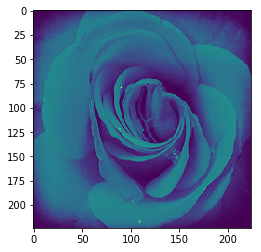

In [8]:
plt.imshow(array_to_img(X[0]))

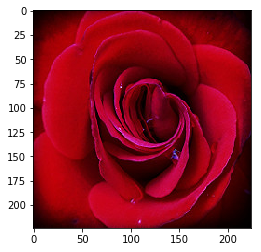

In [9]:
plt.imshow(array_to_img(train[0]))

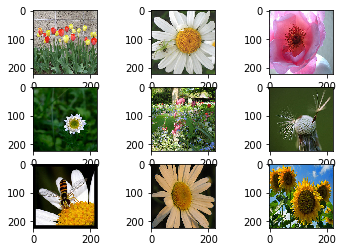

In [10]:
test = []
fikes = glob.glob("../input/valid_data/valid/*.jpg")
for myfile in fikes:
    test_img = load_img(myfile,target_size=(224,224),color_mode="rgb")
    test_img= img_to_array(test_img)
    test_img = test_img / 255
    test.append(test_img)

for i in range(1,10):
    plt.subplot(330 + 0 + i)
    plt.imshow(array_to_img(test[i]))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1700
1700
729
729


In [13]:
x_train = np.asarray(x_train)
print("The Shape of Train array is",x_train.shape)

y_train = np.asarray(y_train)
print("The Shape of Train output array is",y_train.shape)

x_test = np.asarray(x_test)
print("The Shape of Test array is",x_test.shape)

y_test = np.asarray(y_test)
print("The Shape of Test output array is",y_test.shape)

The Shape of Train array is (1700, 224, 224, 1)
The Shape of Train output array is (1700, 224, 224, 2)
The Shape of Test array is (729, 224, 224, 1)
The Shape of Test output array is (729, 224, 224, 2)


In [14]:
img_rows = 224
img_cols = 224
channels = 3

In [15]:
# Creating Encoder Model

latent_dim = 1000
input_img = Input(shape = (img_rows,img_cols,1), name='encoder_input')

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
encoded = MaxPooling2D(pool_size=(2, 2), padding='same')(conv5)

shape = K.int_shape(encoded)


# generate a latent vector
x = Flatten()(encoded)
fc1 = Dense(4096, name ='FC-1')(x)
fc2 = Dense(4096, name = 'FC-2')(fc1)
latent = Dense(latent_dim, name='latent_vector')(fc2)

# instantiate encoder model
encoder = Model(input_img, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0   

In [16]:
#Creating Decoder Model

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
up1 = UpSampling2D((2,2))(conv6)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv7)
conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv8)
conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
up4 = UpSampling2D((2, 2))(conv9)
conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
up5 = UpSampling2D((2, 2))(conv10)
decoded = Conv2D(2, (3, 3), activation='tanh', padding='same')(up5)

# instantiate decoder model
decoder = Model(latent_inputs, decoded, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 25088)             25113088  
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         2359808   
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 256)       1179904   
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 256)       0   

In [17]:
import keras
from keras import optimizers
#Fitting the model
autoencoder = Model(input_img, decoder(encoder(input_img)))
#adam = optimizers.Adam(learning_rate=0.001,amsgrad=False)
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [18]:
autoencoder.fit(x_train,y_train,verbose = 1, epochs = 30,batch_size = 128, validation_data=(x_test,y_test))

Train on 1700 samples, validate on 729 samples
Epoch 1/30
1700/1700 [==============================] - 15s 9ms/sample - loss: 0.8165 - accuracy: 0.4914 - val_loss: 0.8923 - val_accuracy: 0.3047
Epoch 2/30
1700/1700 [==============================] - 6s 4ms/sample - loss: 0.3764 - accuracy: 0.6229 - val_loss: 0.0348 - val_accuracy: 0.7228
Epoch 3/30
1700/1700 [==============================] - 6s 4ms/sample - loss: 0.0319 - accuracy: 0.7348 - val_loss: 0.0319 - val_accuracy: 0.7228
Epoch 4/30
1700/1700 [==============================] - 6s 3ms/sample - loss: 0.0315 - accuracy: 0.7347 - val_loss: 0.0306 - val_accuracy: 0.7228
Epoch 5/30
1700/1700 [==============================] - 6s 4ms/sample - loss: 0.0321 - accuracy: 0.7344 - val_loss: 0.0313 - val_accuracy: 0.7228
Epoch 6/30
1700/1700 [==============================] - 6s 3ms/sample - loss: 0.0315 - accuracy: 0.7348 - val_loss: 0.0313 - val_accuracy: 0.7228
Epoch 7/30
1700/1700 [==============================] - 6s 3ms/sample - loss

In [19]:
x_decoded = autoencoder.predict(x_test)

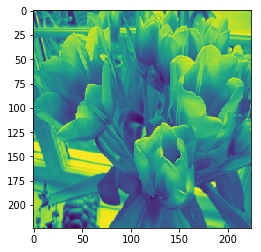

In [20]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

plt.imshow(array_to_img(x_test[0]))

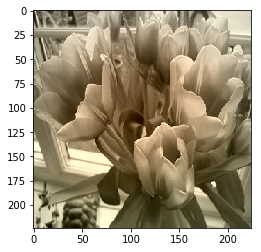

In [21]:
ab = x_decoded[0] * 128
l = x_test[0]
l = np.reshape(l,(224,224))
reconstructed_img = np.zeros((224, 224, 3))
reconstructed_img[:, :, 0]= l
reconstructed_img[:, :, 1:] = ab
plt.imshow(lab2rgb(reconstructed_img))
#imsave('reconstructed_img'+ str(ids)+".png" ,lab2rgb(reconstructed_img))

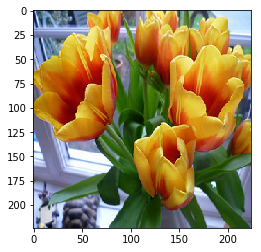

In [22]:
ab = y_test[0] * 128
l = x_test[0]
l = np.reshape(l,(224,224))
reconstructed_img = np.zeros((224, 224, 3))
reconstructed_img[:, :, 0]= l
reconstructed_img[:, :, 1:] = ab
plt.imshow(lab2rgb(reconstructed_img))    

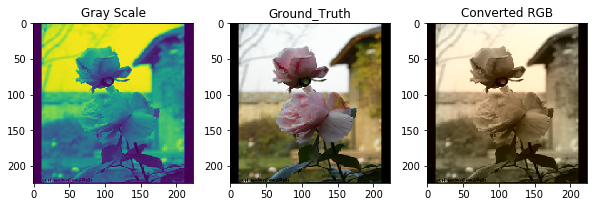

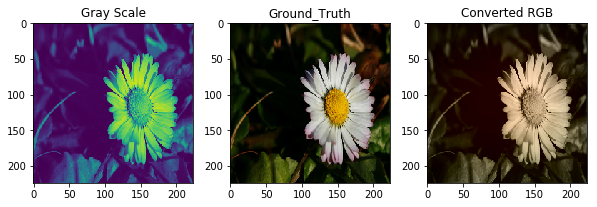

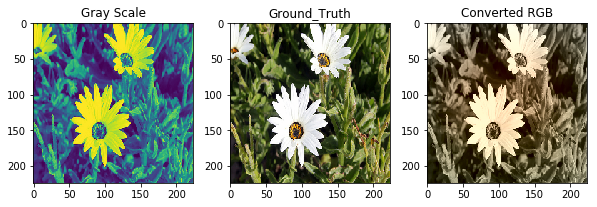

In [24]:
for i in range(1,4):
    fig = plt.figure(figsize=(10,10))
    
    ab = x_decoded[i] * 128
    l = x_test[i]
    l = np.reshape(l,(224,224))
    reconstructed_img = np.zeros((224, 224, 3))
    reconstructed_img[:, :, 0]= l
    reconstructed_img[:, :, 1:] = ab
    
    bc = y_test[i] * 128
    original_img = np.zeros((224, 224, 3))
    original_img[:, :, 0]= l
    original_img[:, :, 1:] = bc
    
    ax1 = fig.add_subplot(3,3,1)
    ax1.set_title("Gray Scale")
    ax1.imshow(array_to_img(x_test[i]))
    
    ax2 = fig.add_subplot(3,3,2)
    ax2.set_title("Ground_Truth")
    ax2.imshow(lab2rgb(original_img))
    
    ax3 = fig.add_subplot(3,3,3)
    ax3.set_title("Converted RGB")
    ax3.imshow(lab2rgb(reconstructed_img))

In [ ]:
for i in range(1,11):
    ab = x_decoded[i] * 128
    l = x_test[i]
    l = np.reshape(l,(224,224))
    reconstructed_img = np.zeros((224, 224, 3))
    reconstructed_img[:, :, 0]= l
    reconstructed_img[:, :, 1:] = ab
    imsave('reconstructed_img'+ str(i)+".png" ,lab2rgb(reconstructed_img))